# Read Me

Module Name: Grassland Curing Data Time Series

Date of creation: 17/05/2022

Name of creator of module : GM

History of modification:
    Last modification: 19/05
    Modifications: Raw script to Juypter notebook 
    - added a loop for multiple fwd and changes a few variable names 

Summary of what the module does: 

Reads fire weather district (fwd) shape files as a dataframe 

Reads in avaliable MODIS curing data from 2015-2020

Loops over the day of year, for each year every 8 days

Loop opens MODIS data using xarray (xr) and clips array by the fire weather district shape files

Generates a basic plot for the array for curing data over time

typical calls: file_path = '/g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/'

file path = curing-filled_modis-mapvictoria_8day_500m_vic_%s.tif

fwd_shapefile_path = '/g/data/ct18/dw4060/viirs/inputfiles/boundaries/FWFDistricts_MapID_WGS84_May2022.shp'

# Packages

In [2]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
import datetime
import glob
import os

# Read data

In [3]:
#read in fire weather district shape files (fwd)
fwd_shapefile_path = '/g/data/ct18/dw4060/viirs/inputfiles/boundaries/FWFDistricts_MapID_WGS84_May2022.shp'
df = gpd.read_file(fwd_shapefile_path)
#print(type(df))
#print(df.head(n=10))
#print(df.tail(n=10))
#read in MODIS curing data
curing_file_path = '/g/data/er8/global_challenge/curing'
#old file path /g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/



# Constants

In [4]:
#curing data
#year = 2015
#t0 = datetime.datetime(year, 7, 1)
time_array = []
median_curing_value = []

# Analysis and loops

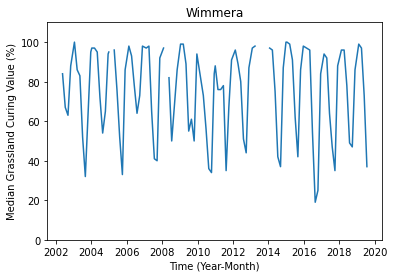

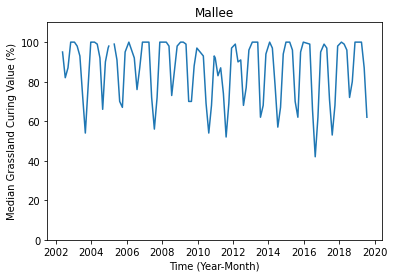

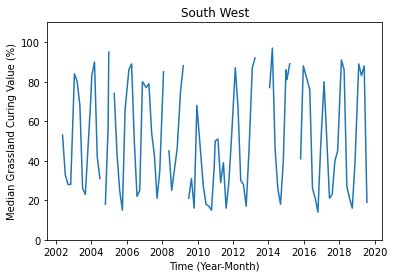

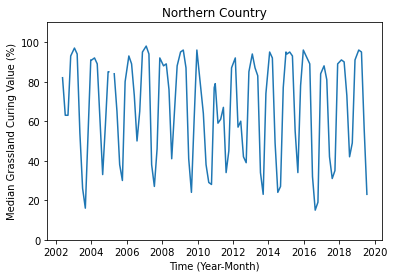

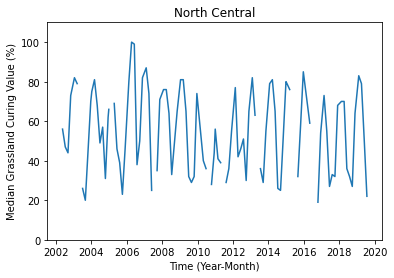

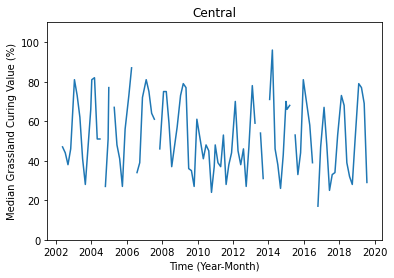

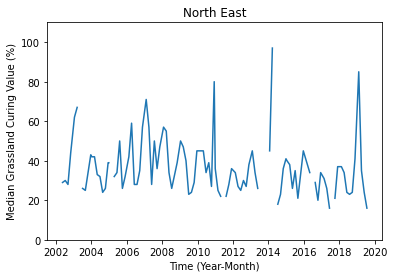

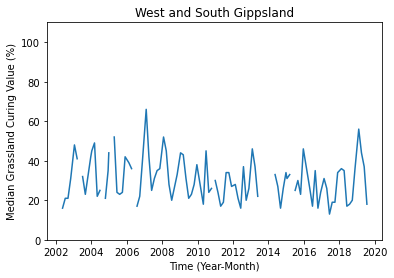

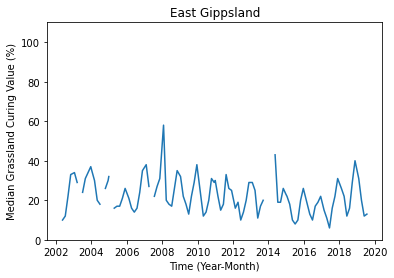

In [13]:
fwd_districts = ["Wimmera", "Mallee", "South West", "Northern Country", "North Central", "Central", "North East", "West and South Gippsland", "East Gippsland"]
total_data = []


for name in range(len(fwd_districts)):
    fwd_geometry = df[df['DIST_NAME'] == fwd_districts[name]].geometry.values
    year = 2002
    t0 = datetime.datetime(year, 4, 6)
    time_array = []
    median_curing_value = []
    for doy in range(0, 6955, 7):
        current_date = t0 + datetime.timedelta(days=doy)
        fns = glob.glob(os.path.join(curing_file_path, "curing_modis-mapvictoria_8day_500m_vic_%s.tif" % (current_date.strftime('%Y%m%d')+'-'+((current_date + datetime.timedelta(7)).strftime('%Y%m%d')))))
        #print(curing_file_path)
        #print(current_date.strftime('%Y%m%d')+'-'+((current_date + datetime.timedelta(6)).strftime('%Y%m%d')))
        #previous curing-filled_modis-mapvictoria_8day_500m_vic_%s.ti
        #print("fns", fns)
    #cheking file exists
        if len(fns) == 1: 
        #open file using xr
            ds = xr.open_dataset(fns[0]) 
            #taking the grassland curing data (gci) and clipping I with the geometry of the fwds
            gci_clipped_to_fwd = ds.rio.clip(fwd_geometry, df.crs)
            #calculte the mean for the clipped gci
            #determine mean curing values for the all the fwds and structure them as an array starting from the first idex
            median_curing_value.append(gci_clipped_to_fwd.median().to_array().values[0])
            for x in range(0,len(median_curing_value)):
                if median_curing_value[x] in range(100,116):
                    median_curing_value[x]=100
                if median_curing_value[x] in range(116,255):
                    median_curing_value[x]=np.nan
                else:
                    median_curing_value[x]=median_curing_value[x]

                    
            #add current date variable to the time arrazy variable 
            time_array.append(current_date)
            

#plotting out array (you can also stor you plot as a variable/object to manipulate it further)
    plt.plot(time_array,median_curing_value)
    plt.title(fwd_districts[name])
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Median Grassland Curing Value (%)')
    plt.ylim(0,110)
    plt.show()
    total_data.append([time_array, median_curing_value])
#plt.savefig("curing_timeline.png")

#print(total_data)

#count of null pixels 
#exclue data before calculating the median 
#number of observation 
#percentage of pixels in the district 

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

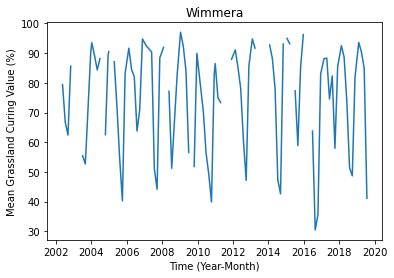

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

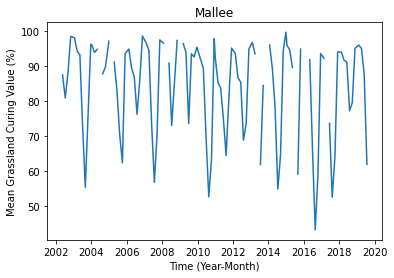

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

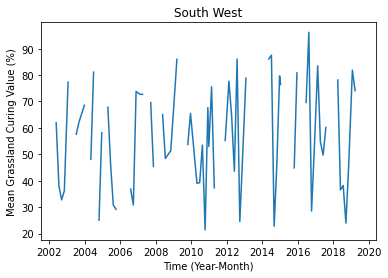

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

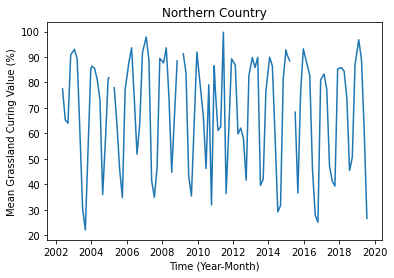

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

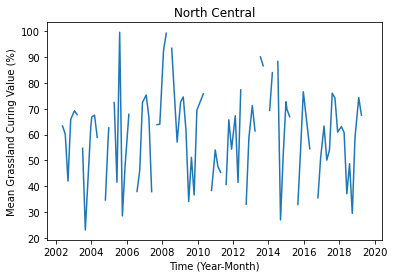

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

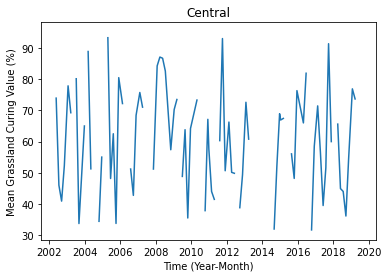

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

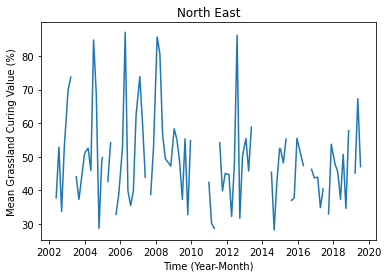

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

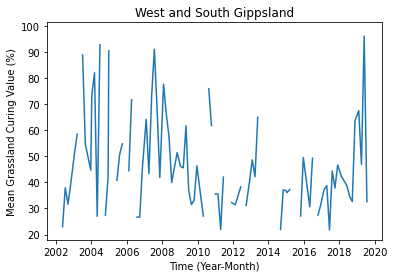

/g/data/er8/global_challenge/curing
20020406-20020412
/g/data/er8/global_challenge/curing
20020413-20020419
/g/data/er8/global_challenge/curing
20020420-20020426
/g/data/er8/global_challenge/curing
20020427-20020503
/g/data/er8/global_challenge/curing
20020504-20020510
/g/data/er8/global_challenge/curing
20020511-20020517
/g/data/er8/global_challenge/curing
20020518-20020524
/g/data/er8/global_challenge/curing
20020525-20020531
<xarray.Dataset>
Dimensions:      (band: 1, x: 1938, y: 1128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 140.9 140.9 140.9 140.9 ... 150.0 150.0 150.0 150.0
  * y            (y) float64 -33.9 -33.91 -33.91 -33.92 ... -39.19 -39.19 -39.2
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...
/g/data/er8/global_challenge/curing
20020601-20020607
/g/data/er8/global_challenge/curing
20020608-20020614
/g/data/er8/global_challenge/curing
20020615-20020621
/g/data/er8/global_challenge/curing
20020622-20020628

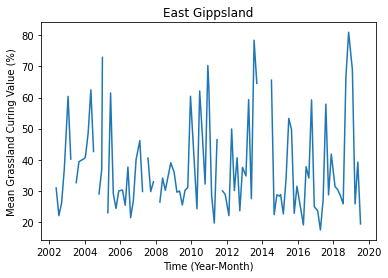

[[[datetime.datetime(2002, 5, 25, 0, 0), datetime.datetime(2002, 7, 20, 0, 0), datetime.datetime(2002, 9, 14, 0, 0), datetime.datetime(2002, 11, 9, 0, 0), datetime.datetime(2003, 1, 25, 0, 0), datetime.datetime(2003, 3, 22, 0, 0), datetime.datetime(2003, 5, 17, 0, 0), datetime.datetime(2003, 7, 12, 0, 0), datetime.datetime(2003, 9, 6, 0, 0), datetime.datetime(2003, 12, 27, 0, 0), datetime.datetime(2004, 1, 17, 0, 0), datetime.datetime(2004, 3, 13, 0, 0), datetime.datetime(2004, 5, 8, 0, 0), datetime.datetime(2004, 7, 3, 0, 0), datetime.datetime(2004, 8, 28, 0, 0), datetime.datetime(2004, 10, 23, 0, 0), datetime.datetime(2004, 12, 18, 0, 0), datetime.datetime(2005, 1, 1, 0, 0), datetime.datetime(2005, 2, 26, 0, 0), datetime.datetime(2005, 4, 23, 0, 0), datetime.datetime(2005, 6, 18, 0, 0), datetime.datetime(2005, 8, 13, 0, 0), datetime.datetime(2005, 10, 8, 0, 0), datetime.datetime(2005, 12, 3, 0, 0), datetime.datetime(2006, 2, 18, 0, 0), datetime.datetime(2006, 4, 15, 0, 0), datetime.d

In [6]:
fwd_districts = ["Wimmera", "Mallee", "South West", "Northern Country", "North Central", "Central", "North East", "West and South Gippsland", "East Gippsland"]
total_data = []


for name in range(len(fwd_districts)):
    fwd_geometry = df[df['DIST_NAME'] == fwd_districts[name]].geometry.values
    year = 2002
    t0 = datetime.datetime(year, 4, 6)
    time_array = []
    mean_curing_value = []
    for doy in range(0, 6955, 7):
        current_date = t0 + datetime.timedelta(days=doy)
        #curing_modis-mapvictoria_8day_500m_vic_%s.tif
        fns = glob.glob(os.path.join(curing_file_path, "curing_modis-mapvictoria_8day_500m_vic_%s.tif" % (current_date.strftime('%Y%m%d')+'-'+((current_date + datetime.timedelta(7)).strftime('%Y%m%d')))))
        print(curing_file_path)
        print(current_date.strftime('%Y%m%d')+'-'+((current_date + datetime.timedelta(6)).strftime('%Y%m%d')))
        #curing-filled_modis-mapvictoria_8day_500m_vic_%s.ti
        #print("fns", fns)
    #cheking file exists
        if len(fns) == 1: 
        #opening the file using xr
            ds = xr.open_dataset(fns[0])
            #ds = xr.where(ds > 100.00, np.nan, ds)
            #ds = xr.where(ds < 0.00, np.nan, ds)    
            print(ds)
            #taking the grassland curing data (gci) and clipping I with the geometry of the fwds
            gci_clipped_to_fwd = ds.rio.clip(fwd_geometry, df.crs)
            #calculte the mean for the clipped gci
            #determine mean curing values for the all the fwds and structure them as an array starting from the first idex
            mean_curing_value.append(gci_clipped_to_fwd.mean().to_array().values[0])
            for x in range(0,len(mean_curing_value)):
                if mean_curing_value[x]>100.0:
                    mean_curing_value[x]=np.nan
                else:
                    mean_curing_value[x]=mean_curing_value[x]
            #add current date variable to the time arrazy variable 
            time_array.append(current_date)
            

#plotting out array (you can also stor you plot as a variable/object to manipulate it further)
    plt.plot(time_array,mean_curing_value)
    plt.title(fwd_districts[name])
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Mean Grassland Curing Value (%)')
    plt.show()
    total_data.append([time_array, mean_curing_value])
#plt.savefig("curing_timeline.png")

print(total_data)
    

In [7]:
mean_curing_value

[30.897858,
 22.001495,
 26.096954,
 37.134563,
 60.376556,
 40.212948,
 nan,
 32.605637,
 39.36151,
 40.40428,
 40.913853,
 48.488064,
 62.491234,
 42.645874,
 nan,
 28.976135,
 36.865643,
 72.91051,
 nan,
 22.934883,
 61.462566,
 29.089735,
 24.314201,
 29.95089,
 30.240631,
 25.343925,
 37.6381,
 21.34881,
 26.861334,
 40.055344,
 46.149776,
 29.776915,
 nan,
 40.526604,
 29.729647,
 32.910423,
 nan,
 26.387259,
 34.09215,
 30.153072,
 39.00725,
 35.93098,
 29.552176,
 29.914284,
 25.430908,
 30.166496,
 31.0358,
 60.40723,
 24.216265,
 62.12854,
 47.67163,
 32.144253,
 70.29622,
 63.24241,
 28.664906,
 19.607416,
 46.44887,
 nan,
 29.96444,
 28.854847,
 22.016249,
 49.903736,
 30.058285,
 40.6317,
 23.578812,
 37.550365,
 34.761345,
 59.352463,
 27.439487,
 78.46297,
 64.577675,
 nan,
 32.538742,
 nan,
 nan,
 65.60005,
 22.329372,
 28.687525,
 28.299837,
 28.794554,
 22.551798,
 33.797565,
 53.292473,
 49.69102,
 22.750372,
 31.45994,
 19.01947,
 37.752243,
 34.111694,
 59.22588,
 